In [64]:
from typing import List, Tuple, Iterable
import random

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

# P2: Perceptron Learning Rule

Om de perceptron learning rule te implementeren moeten we de volgende begrippen implementeren:

- `target`, `input`, `weights` en `bias`.
- `output = activation(weighted_sum)`.
- `error = target - output`.
- `eta = 0.1`, wordt ook wel de learning rate genoemd en is een hyperparameter.
- `delta_weight = eta * error * input`.
- `delta_bias = eta * error`.
- `weight_derivative = weight + delta_weight`.
- `bias_derivative = bias + delta_bias`.
- `mean_squared_error = sum(error**2) / n`.

Deze begrippen kunnen we samenvoegen tot de `update()` en `loss()` functies die in 
`p2_perceptron_learning_rule.Perceptron` geïmplementeerd zijn.

In [65]:
from p1_perceptron import step_activation
from p2_perceptron_learning_rule import Perceptron

## AND-poort

In `p1_perceptron.ipynb` is de truth table voor een AND-poort al gedefinieerd en gaat als volgt:

In [66]:
truth_table_AND = (
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1),
    ([0, 0], 0),
)

De geïmplementeerde functionaliteit werkt echter veel met de input en verwachte waardes in aparte lists.

In [67]:
_AND_zipped = tuple(zip(*truth_table_AND))
AND_inputs = _AND_zipped[0]
AND_expected = _AND_zipped[1]

print(f"{'Train data:':20} {AND_inputs}\n{'Verwachte waardes:':20} {AND_expected}")

Train data:          ([0, 1], [1, 0], [1, 1], [0, 0])
Verwachte waardes:   (0, 0, 1, 0)


We kunnen ook de functie voor het vergelijken van de output tegen de truth table lenen.

In [68]:
def compare_to_truth_table(inputs: Tuple[List[float]], obj: Perceptron) -> None:
    outputs = []

    for row in inputs:
        output = obj.activate(row)
        print(f"Input {row} geeft als output: {output}")
        outputs.append(output)

    return outputs

Als laatste stap kunnen we de `learning_rate` van tevoren vastzetten aangezien deze voor nu altijd `0.1` zal zijn.

In [69]:
learning_rate = 0.1

Nu kunnen we alles hierboven gebruiken om een perceptron te trainen. Volgens 
[Rosenblatt’s initial perceptron rule]()
beginnen we met het initialiseren van de gewichten als 0 of willekeurige kleine getallen. Voor deze opdracht moeten er
willekeurige getallen gebruikt worden.

In [70]:
random.seed(1804439)
random_weight = lambda: round(random.random() * 2 - 1, 4)  # Willekeurig getal tussen -1 en 1

perceptron_AND = Perceptron([random_weight(), random_weight()], random_weight(), step_activation, learning_rate)
print(perceptron_AND)

<Perceptron {activation: step, bias: -0.5418, weights: [0.2025, 0.9821]}>


Als we deze perceptron nu vergelijken met de truth table:

In [71]:
compare_to_truth_table(AND_inputs, perceptron_AND)
print("MSE:", perceptron_AND.loss(AND_inputs, AND_expected))

Input [0, 1] geeft als output: 1.0
Input [1, 0] geeft als output: 0.0
Input [1, 1] geeft als output: 1.0
Input [0, 0] geeft als output: 0.0
MSE: 0.25


Dit is compleet fout dus laten we update een keer uitvoeren.

In [72]:
print(perceptron_AND.update_multiple(AND_inputs, AND_expected))
print("MSE:", perceptron_AND.loss(AND_inputs, AND_expected))

<Perceptron {activation: step, bias: -0.6417999999999999, weights: [0.2025, 0.8821]}>
MSE: 0.25


Er is wat verandering maar nog niet echt een verbetering. Laten we de `train()` methode gebruiken om de perceptron te
trainen totdat de MSE minder dan `0.25` is.

In [73]:
perceptron_AND.train(AND_inputs, AND_expected, loss_limit=0.125)
compare_to_truth_table(AND_inputs, perceptron_AND);

print(perceptron_AND)

Input [0, 1] geeft als output: 0.0
Input [1, 0] geeft als output: 0.0
Input [1, 1] geeft als output: 1.0
Input [0, 0] geeft als output: 0.0
<Perceptron {activation: step, bias: -0.8417999999999999, weights: [0.2025, 0.6821]}>


## XOR-poort

Hieronder te waardes voor het trainen van een XOR perceptron.

In [74]:
XOR_input = AND_inputs
XOR_expected = (1, 1, 0, 0)

En weer de opnieuw geïnitialiseerde perceptron.

In [75]:
random.seed(1804439)
perceptron_XOR = Perceptron([random_weight(), random_weight()], random_weight(), step_activation, 0.1)
print(perceptron_XOR)

compare_to_truth_table(XOR_input, perceptron_XOR)
print("MSE:", perceptron_XOR.loss(XOR_input, XOR_expected))

<Perceptron {activation: step, bias: -0.5418, weights: [0.2025, 0.9821]}>
Input [0, 1] geeft als output: 1.0
Input [1, 0] geeft als output: 0.0
Input [1, 1] geeft als output: 1.0
Input [0, 0] geeft als output: 0.0
MSE: 0.5


Nu kunnen we deze perceptron trainen met een maximum van `100` iteraties.

In [76]:
print(perceptron_XOR.train(XOR_input, XOR_expected, max_iterations=100))

compare_to_truth_table(XOR_input, perceptron_XOR)
print("MSE:", perceptron_XOR.loss(XOR_input, XOR_expected))

<Perceptron {activation: step, bias: -0.041799999999999976, weights: [-0.09750000000000003, -0.017899999999999888]}>
Input [0, 1] geeft als output: 0.0
Input [1, 0] geeft als output: 0.0
Input [1, 1] geeft als output: 0.0
Input [0, 0] geeft als output: 0.0
MSE: 0.5


Zoals je kan zien is de MSE na `100` iteraties nog steeds niet verbeterd. We kunnen dit verklaren d.m.v. grafieken.

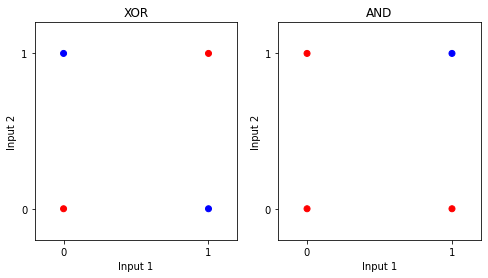

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
list(x.set(xlabel = "Input 1", 
           ylabel = "Input 2", 
           xticks = [0, 1], 
           yticks = [0, 1], 
           xlim = (-0.2, 1.2),
           ylim = (-0.2, 1.2)) for x in ax)

ax[0].scatter([0, 1, 0, 1], [0, 1, 1, 0], c = ("red", "red", "blue", "blue"))
ax[0].set(title = "XOR")

ax[1].scatter([0, 1, 0, 1], [0, 1, 1, 0], c = ("red", "blue", "red", "red"))
ax[1].set(title = "AND");

Een perceptron is een `linear classifier`, dat betekent bijvoorbeeld dat er een lijn getrokken wordt en alles aan de ene
kant van de lijn bij de ene klasse hoort en alles aan de andere kant bij de andere klasse hoort. Bij de AND grafiek kan
je bijvoorbeeld een lijn van (0.5, 1) naar (1, 0.5) trekt dan zijn alle punten die aan moeten staan boven de lijn en
alles dat uit moet eronder.

Om te laten zien welke lijn de perceptron trekt heb ik een functie gemaakt gebaseerd op 
[het volgende artikel](https://www.thomascountz.com/2018/04/13/calculate-decision-boundary-of-perceptron). 

In [78]:
def calculate_y(x: float, perceptron: Perceptron) -> float:
    weight_1, weight_2 = perceptron.weights
    slope = -(perceptron.bias / weight_2) / (perceptron.bias / weight_1)
    return (slope * x) + (-perceptron.bias / weight_2)

En deze kunnen we vervolgens tekenen op de vorige grafiek.

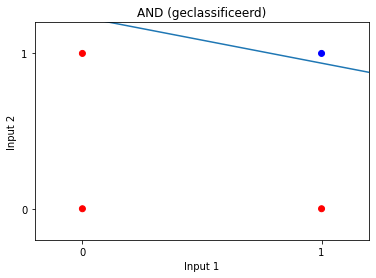

In [79]:
fig, ax = plt.subplots()

ax.set(xlabel = "Input 1", 
        ylabel = "Input 2", 
        xticks = [0, 1], 
        yticks = [0, 1], 
        xlim = (-0.2, 1.2),
        ylim = (-0.2, 1.2),
        title = "AND (geclassificeerd)")
ax.scatter([0, 1, 0, 1], [0, 1, 1, 0], c = ("red", "blue", "red", "red"))
ax.plot(list(range(3)), list(calculate_y(x, perceptron_AND) for x in range(3)));

Voor de XOR-grafiek is het niet mogelijk een lijn te tekenen waarbij beide rode punten aan de ene kant zitten en de 
blauwe aan de andere kant.

## Iris Dataset

Om een perceptron op de iris dataset te trainen moeten we deze eerst ophalen.

In [80]:
iris = load_iris()
iris.data[:10], iris.target[:10], iris.target_names

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

Voor deze opdracht hebben we 2 subsets van iris nodig, 1 met setosa en versicolor en 1 met versicolor en virginica. Voor
de eerste kunnen we over de dataset heen itereren en alle rijen met een target van 2 verwijderen. We houden dan alleen
rijen met 0 of 1 als target wat toevallig precies hetgeen is dat we nodig hebben om een perceptron te trainen.

In [81]:
# se_ve betekent setosa en versicolor
iris_se_ve_data, iris_se_ve_target = zip(*((list(x), y) for x, y in zip(iris.data, iris.target) if y != 2))
print(set(iris_se_ve_target), len(iris_se_ve_data))

{0, 1} 100


En voor de tweede dataset kunnen we alles met target 0 weghalen, dan blijven alleen 1 en 2 over. Als we hier 1 van 
aftrekken hebben we een target dat de perceptron kan gebruiken.

In [82]:
iris_ve_vi_data, iris_ve_vi_target = zip(*((list(x), y-1) for x, y in zip(iris.data, iris.target) if y != 0))
print(set(iris_se_ve_target), len(iris_se_ve_data))
print(iris_ve_vi_data[:5])

{0, 1} 100
([7.0, 3.2, 4.7, 1.4], [6.4, 3.2, 4.5, 1.5], [6.9, 3.1, 4.9, 1.5], [5.5, 2.3, 4.0, 1.3], [6.5, 2.8, 4.6, 1.5])


Nu maken we een Perceptron met 4 inputs en willekeurige weights.

In [83]:
random.seed(1804439)
perceptron_iris_se_ve = Perceptron([random_weight() for _ in range(4)],
                                   random_weight(), step_activation, 0.1)
print(perceptron_iris_se_ve)

<Perceptron {activation: step, bias: 0.5865, weights: [0.2025, 0.9821, -0.5418, 0.1521]}>


De MSE voor de huidige staat is:

In [84]:
print(perceptron_iris_se_ve.loss(iris_se_ve_data, iris_se_ve_target))

0.5


En na het trainen:

In [85]:
print(perceptron_iris_se_ve.train(iris_se_ve_data, iris_se_ve_target))
print("MSE:", perceptron_iris_se_ve.loss(iris_se_ve_data, iris_se_ve_target))

<Perceptron {activation: step, bias: 0.2865000000000001, weights: [-0.3174999999999999, -0.1379000000000002, 0.6982000000000003, 0.6920999999999999]}>
MSE: 0.0


Een MSE van `0,0` is uitzonderlijk goed. Er zit waarschijnlijk een duidelijke lineaire grens tussen de twee klasse.

We gaan verder met het aanmaken van een tweede perceptron.

In [86]:
random.seed(1804439)
perceptron_iris_ve_vi = Perceptron([random_weight() for _ in range(4)],
                             random_weight(), step_activation, 0.1)
print(perceptron_iris_ve_vi)
print("MSE:", perceptron_iris_ve_vi.loss(iris_ve_vi_data, iris_ve_vi_target))

<Perceptron {activation: step, bias: 0.5865, weights: [0.2025, 0.9821, -0.5418, 0.1521]}>
MSE: 0.5


In [87]:
print(perceptron_iris_ve_vi.train(iris_ve_vi_data, iris_ve_vi_target))
print(perceptron_iris_ve_vi.loss(iris_ve_vi_data, iris_ve_vi_target))

<Perceptron {activation: step, bias: 0.48650000000000004, weights: [-4.337500000000007, -0.6279000000000012, 4.538199999999996, 4.3721000000000005]}>
0.08


De MSE is iets hoger. 

We kunnen voor de zekerheid een aantal waardes uit de dataset nemen en kijken of deze goed geclassificeerd worden.

In [88]:
flowers = [
    (iris.data[0], iris.target[0]),
    (iris.data[76], iris.target[76]),
    (iris.data[124], iris.target[124]),
]

print(flowers)

assert perceptron_iris_se_ve.activate(flowers[0][0]) == flowers[0][1]
assert perceptron_iris_se_ve.activate(flowers[1][0]) == flowers[1][1]

assert perceptron_iris_ve_vi.activate(flowers[1][0]) + 1 == flowers[1][1]
assert perceptron_iris_ve_vi.activate(flowers[2][0]) + 1 == flowers[2][1]

[(array([5.1, 3.5, 1.4, 0.2]), 0), (array([6.8, 2.8, 4.8, 1.4]), 1), (array([6.7, 3.3, 5.7, 2.1]), 2)]
